In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("diabetes2.csv", header=None)
data.describe()


,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
columns=data.shape[1]

total=768
train=int(total*0.8)

#Training Data 80%
#Test Data 20%

#Input and output features of Training Data
X=data.iloc[0:train,:-1].values
y=data.iloc[0:train,columns-1:columns].values
m=len(X)#Length of training data
X=(X-X.mean())/(X.std())# Normalising the inputs


In [4]:
#Input and output features of Test Data
X1=data.iloc[train:total,:-1].values #iloc is similar to array slicing
y1=data.iloc[train:total,columns-1:columns].values

X1=(X1-X1.mean())/(X1.std())# Normalising the inputs
m1=len(X1)#Length of Test data

In [5]:
X=np.hstack((np.ones((m,1)),X))#hstack to add colums
X1=np.hstack((np.ones((m1,1)),X1))# adding X0 unit which is one for all rows
theta=np.zeros((1,X.shape[1]))
Lambda=100

In [6]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))# sigmoid function in logistic regression


In [7]:
def CostFunction(theta,X,y):
 
    predictedvalues = sigmoid(X.dot(theta.T))
    costerror =np.multiply(-y,np.log(predictedvalues)) - np.multiply(1-y,np.log(1-predictedvalues))
    Cost = (1/m) *(np.sum(costerror))
    RegCost = Cost + (Lambda/m) *(np.sum(np.power((theta.T),2))) #Regularising the cost function
    
    #Finding dJ/dtheta and regularising it also
    gradient=1/m * (X.transpose()).dot((predictedvalues - y))
    grad1=gradient[0]
    grad1=np.array(grad1).reshape(len(grad1),1)
    grad2= gradient[1:] + (Lambda/m)* (theta.T[1:])
    gradient= np.vstack((grad1,grad2)) # vstack to add rows
    
    return RegCost, gradient

In [8]:
cost,grad=CostFunction(theta,X,y)
print("Initial Cost value is {}".format(cost))#theta is initially zero valued matrix
alpha=1
iterations=1000

Initial Cost value is 0.6931471805599454


In [9]:
def GradientDescent(theta,X,y):
  
    costvalues =np.zeros((iterations,1))#(To store cost values in each iteration)
    for i in range(iterations):
   
        cost,derivative=CostFunction(theta,X,y)# derivative is dJ/dtheta
        thetadescent = alpha * (1/m) * derivative.T
        theta=theta-thetadescent
        costvalues[i]=cost
    
    return theta,costvalues

In [10]:
def predictFunc(theta, X):
    lists=[]
    predictedvalue = sigmoid(X .dot(theta.T))
    for i in predictedvalue:
        if i>=0.5:
            lists.append(1)
        else:
            lists.append(0)
    return lists





In [11]:
def findAccuracy(predictedoutput,y):
    i=0
    lists=[]
    for i in range(len(y)):
        if(predictedoutput[i]==y[i]):
            lists.append(1)
        else:
            lists.append(0)
    return lists
        

In [12]:
theta, costvalues = GradientDescent(theta,X,y)
cost,grad=CostFunction(theta,X,y)#theta is minimised using gradient descent


In [13]:
#Finding Accuracy for training data
predictedoutput = predictFunc(theta, X)
Accuracy =(np.sum(findAccuracy(predictedoutput,y))/(len(y)))*(100)
print("Training Data Accuracy is {}%".format(Accuracy))


#Finding Accuracy for test data
predictedoutput = predictFunc(theta, X1)
Accuracy =(np.sum(findAccuracy(predictedoutput,y1))/(len(y1)))*(100)
print("Test Data Accuracy is {}%".format(Accuracy))




Training Data Accuracy is 65.79804560260585%
Test Data Accuracy is 66.23376623376623%


Text(0.5, 1.0, 'Error vs. No of iterations')

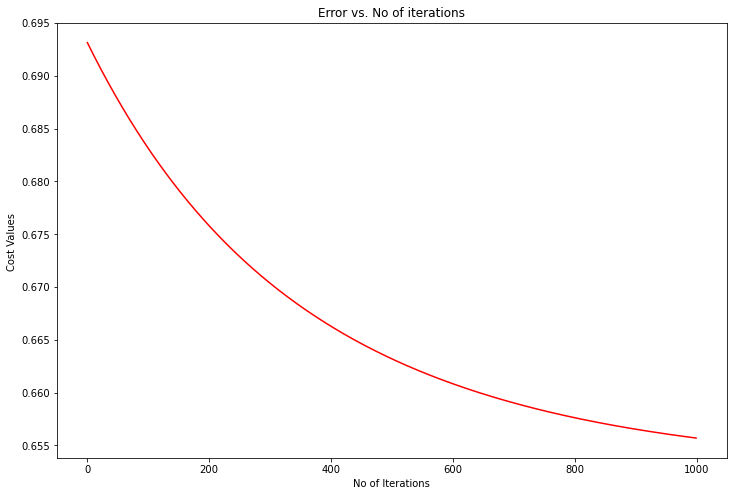

In [14]:
# plot for Squared error and no of iterations
import matplotlib.pyplot as py
fig,sub = py.subplots(figsize=(12,8))
sub.plot(np.arange(1000),costvalues , 'r')
sub.set_xlabel('No of Iterations')
sub.set_ylabel('Cost Values ')
sub.set_title('Error vs. No of iterations')